In [ ]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import pandas as pd
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from PIL import Image
import glob
import scipy.io
import os
import shutil
import matplotlib.patches as patches
import warnings
import tqdm
warnings.filterwarnings("ignore")

In [ ]:
sal=np.load('sai_切割.npy')
sal_ano=np.load('sal_ano_切割.npy')
temp=np.load('temp_切割.npy')
temp_ano=np.load('temp_ano_切割.npy')
das=scipy.io.loadmat('p_2020.mat')
p=np.array(das['p_2020'])

In [ ]:
lon=np.arange(120,127.1,0.1)
lat=np.arange(30,40.05,0.1)
Lon,Lat=np.meshgrid(lon,lat)
time=pd.date_range('2020-06-01','2020-08-31',freq='D')
lev=np.arange(0,30,1)
def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
def get_cmap_colors(cmap_name, n_colors):
    cmap = plt.get_cmap(cmap_name)
    return [cmap(i/n_colors) for i in range(n_colors)]

122 123 32 35 10 20200722 5
缓存：.\figsave\046.png已删除
缓存：.\figsave\047.png已删除
缓存：.\figsave\048.png已删除
缓存：.\figsave\049.png已删除
缓存：.\figsave\050.png已删除
缓存：.\figsave\051.png已删除
缓存：.\figsave\052.png已删除
缓存：.\figsave\053.png已删除
缓存：.\figsave\054.png已删除
缓存：.\figsave\055.png已删除
缓存：.\figsave\056.png已删除


100%|██████████| 11/11 [00:32<00:00,  2.97s/it]


'output.gif'

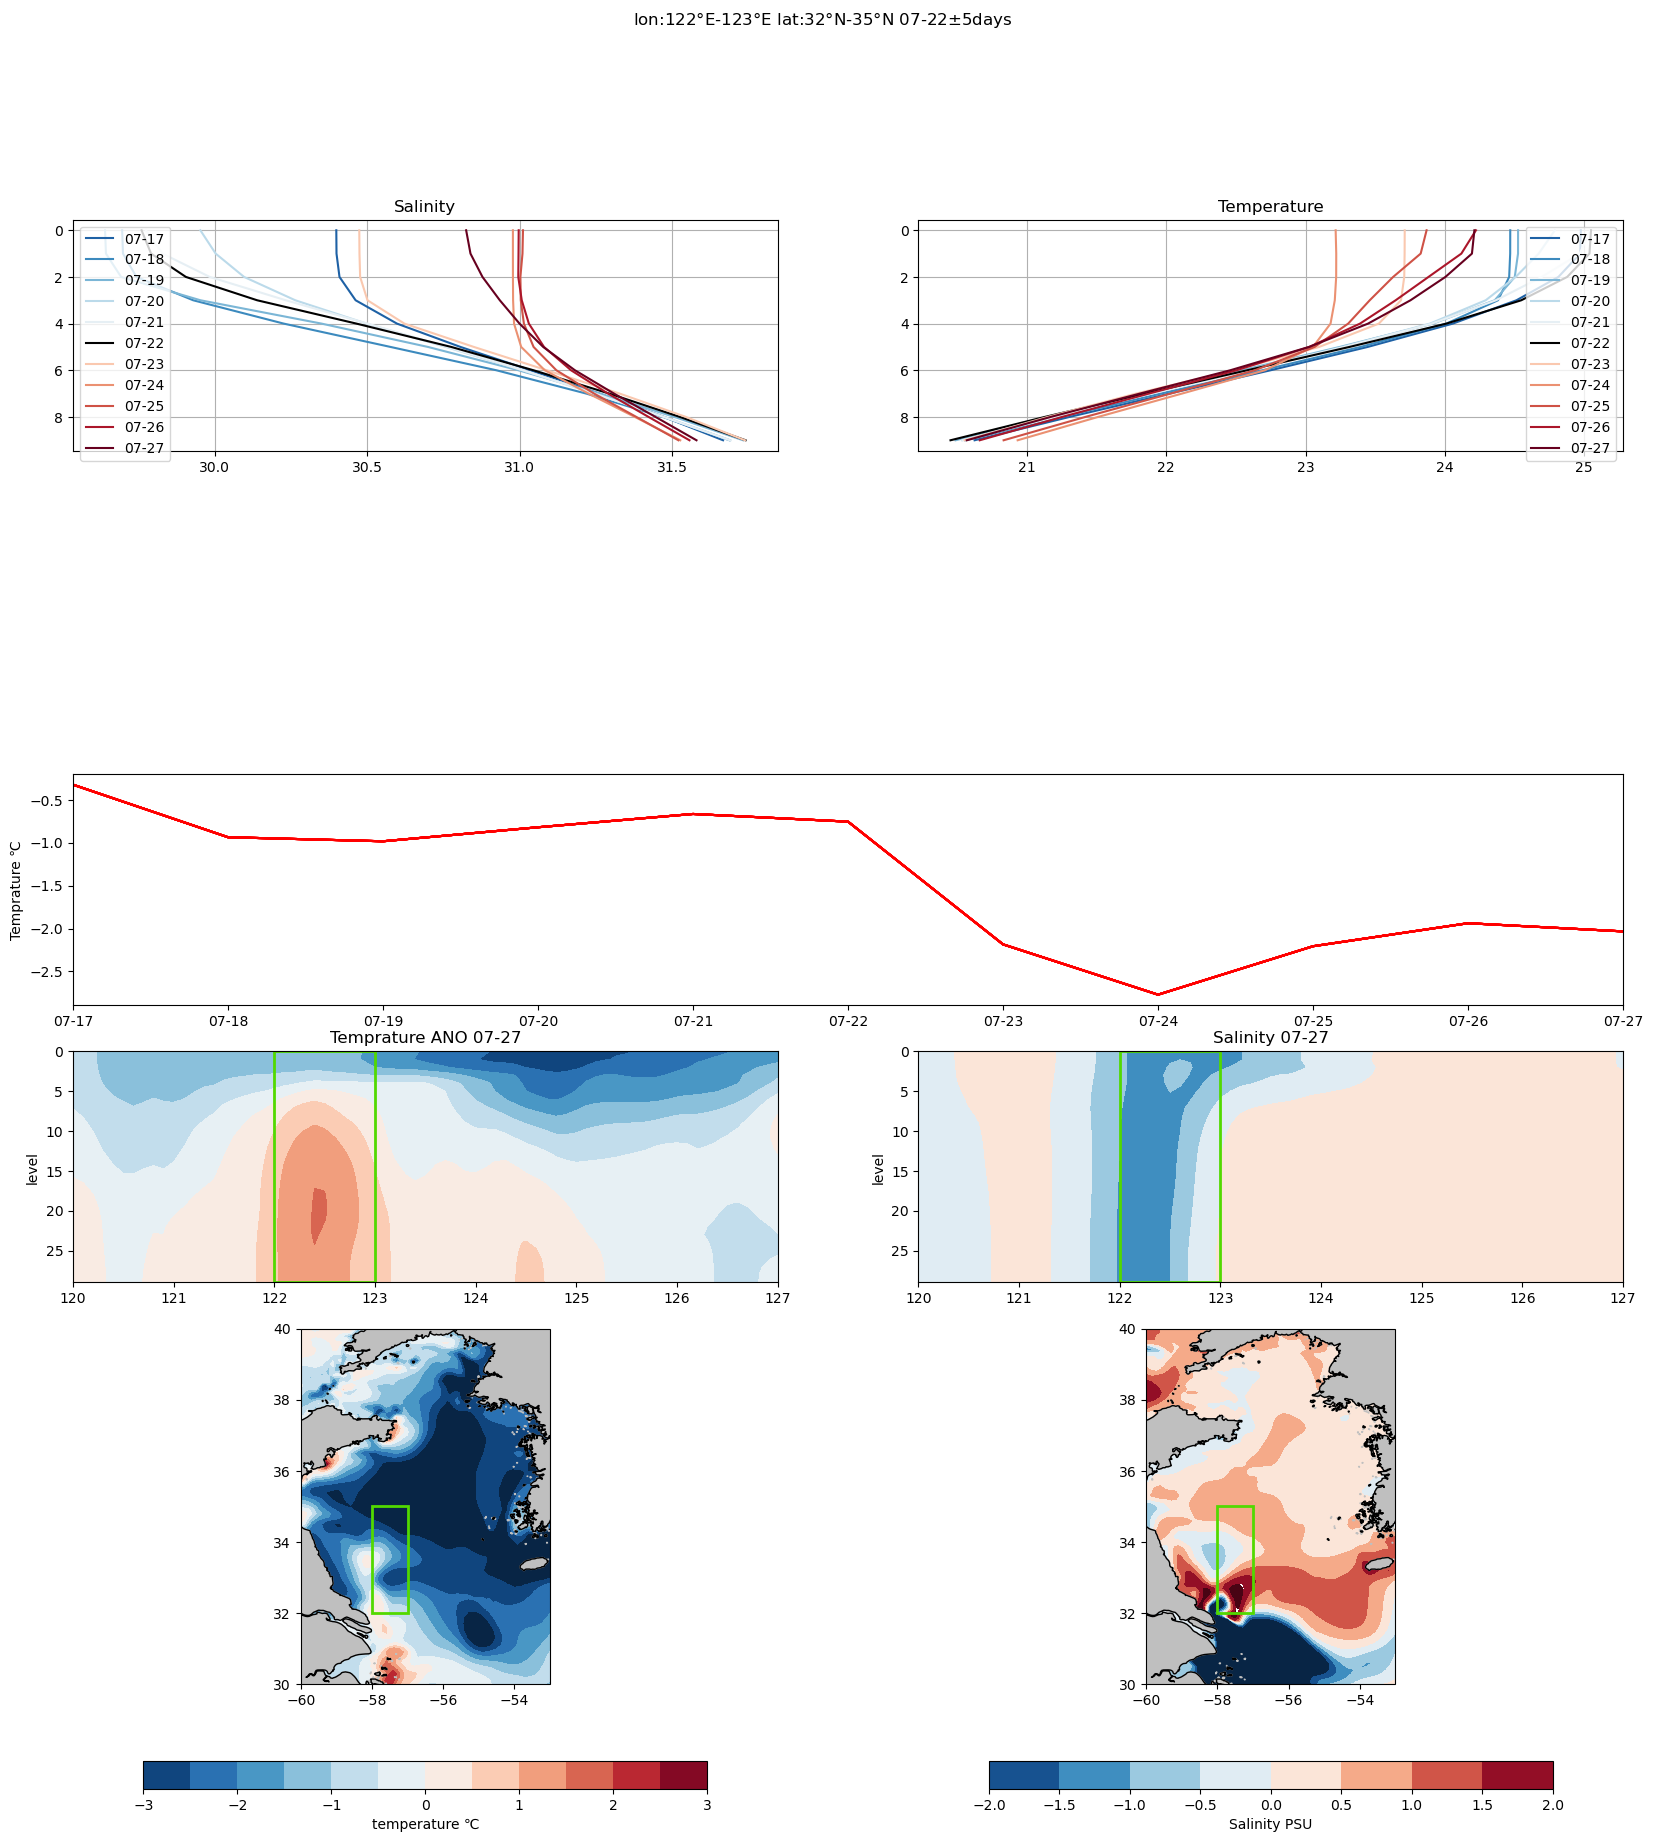

In [122]:
def plot_sea_surface_temperature(left_lon, right_lon, lower_lat, upper_lat, levd,date, n):
    global lon
    global lat
    global time
    global Lon
    global Lat
    global sal
    global sal_ano
    global temp
    global temp_ano
    global lev
    
    print(left_lon, right_lon, lower_lat, upper_lat, levd,date, n)
    folder_path = r'.\figsave'

    ###############################################
    # 删除目录内所有文件
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
            print(rf'缓存：{file_path}已删除')
        except Exception as e:
            print(f'删除文件失败：{file_path}')
    ###############################################
    lonind=(lon>=left_lon)&(lon<=right_lon)
    latind=(lat>=lower_lat)&(lat<=upper_lat)
    timeind=np.where(time==pd.to_datetime(date))[0][0]
    daten=int(n)
    X,D=np.meshgrid(lon,lev)
    
    timess=np.arange(-1*daten,daten+1,1)+timeind
    timess=timess[(timess>=0)&(timess<len(time)-1)]
    #print(timess)
    rgbs=get_cmap_colors('RdBu',2*daten+1)
    
    ###############################################
    plt.figure(figsize=(20,21))
    plt.suptitle(f"lon:{left_lon}°E-{right_lon}°E lat:{lower_lat}°N-{upper_lat}°N {time[timeind].strftime('%m-%d')}$\pm${daten}days")
    plt.subplot(6,2,1)
    plt.title('Salinity')
    for i in timess:
        if i==timeind:
            plt.plot(np.nanmean(sal[:levd,:,:,:][:,lonind,:,:][:,:,latind,:][:,:,:,i],axis=(1,2)),lev[:levd],label=time[i].strftime('%m-%d'),color='black')
            continue
        #print(np.nanmean(sal[:levd,:,:,:][:,lonind,:,:][:,:,latind,:][:,:,:,i],axis=(1,2)).shape)
        #print(lev[:levd].shape)
        plt.plot(np.nanmean(sal[:levd,:,:,:][:,lonind,:,:][:,:,latind,:][:,:,:,i],axis=(1,2)),lev[:levd],label=time[i].strftime('%m-%d'),color=rgbs[daten-i+timeind]) 
    ax=plt.gca()
    ax.invert_yaxis()
    plt.legend()
    plt.grid()
    ###############################################
    plt.subplot(6,2,2)
    plt.title('Temperature')
    for i in timess:
        if i==timeind:
            plt.plot(np.nanmean(temp[:levd,:,:,:][:,lonind,:,:][:,:,latind,:][:,:,:,i],axis=(1,2)),lev[:levd],label=time[i].strftime('%m-%d'),color='black')
            continue
        #print(np.nanmean(sal[:levd,:,:,:][:,lonind,:,:][:,:,latind,:][:,:,:,i],axis=(1,2)).shape)
        #print(lev[:levd].shape)
        plt.plot(np.nanmean(temp[:levd,:,:,:][:,lonind,:,:][:,:,latind,:][:,:,:,i],axis=(1,2)),lev[:levd],label=time[i].strftime('%m-%d'),color=rgbs[daten-i+timeind]) 
    ax=plt.gca()
    ax.invert_yaxis()
    plt.legend()
    plt.grid()
    ###############################################
    for i in tqdm.tqdm(timess):
        plt.subplot(6,2,(3,4))
        plt.title('Precipitation')
        #print(np.nanmean(p[latind,:,:][:,lonind,:][:,:,timess],axis=(0,1)))
        plt.bar((time[timess][0]-pd.Timedelta('1d')).strftime('%m-%d'),[0]);plt.bar(time[timess].strftime('%m-%d'),np.nanmean(p[latind,:,:][:,lonind,:][:,:,timess],axis=(0,1)),color='#2a70b2')
        plt.scatter(time[timess].strftime('%m-%d'),np.nanmean(p[latind,:,:][:,lonind,:][:,:,timess],axis=(0,1)),color='black')
        plt.plot(time[timess].strftime('%m-%d'),np.nanmean(p[latind,:,:][:,lonind,:][:,:,timess],axis=(0,1)),color='black')
        plt.grid()
        plt.xlim(time[timess][0].strftime('%m-%d'),time[timess][-1].strftime('%m-%d'))
        ax_34=plt.gca()
        ax_34.axvspan((time[i]-pd.Timedelta('1d')).strftime('%m-%d'),time[i].strftime('%m-%d'), color='gray', alpha=0.5)
        # ax=plt.gca()
        # ax2=ax.twinx()
        ###############################################
        plt.subplot(6,2,(5,6))
        plt.plot(time[timess].strftime('%m-%d'),np.nanmean(temp_ano[0,:,:,:][:,latind,:][lonind,:,:][:,:,timess],axis=(0,1)),c='r',label='SST Ano')
        #plt.legend()
        plt.ylabel('Temprature ℃')
        ax=plt.gca()
        ax2=ax.twinx()
        ax2.plot([0,0],[0,0],c='r',label='SST Ano')
        ax2.plot(time[timess].strftime('%m-%d'),np.nanmean(sal_ano[0,:,:,:][:,latind,:][lonind,:,:][:,:,timess],axis=(0,1)),label='SSS Ano')
        plt.legend()
        plt.ylabel('Salinity PSU')
        plt.grid()
        plt.xlim(time[timess][0].strftime('%m-%d'),time[timess][-1].strftime('%m-%d'))
        if i!=timess[0]:
            ax_56=plt.gca()
            ax_56.axvspan((time[i]-pd.Timedelta('1d')).strftime('%m-%d'),time[i].strftime('%m-%d'), color='gray', alpha=0.5)
        ###############################################
        #print(timess)
        plt.subplot(6,2,7)
        ax_7=plt.gca()
        ax_7.set_title(f"Temprature ANO {time[i].strftime('%m-%d')}")
        ax_7.contourf(X,D,np.nanmean(temp_ano[:,:,:,i],axis=-1),[3.1,99],colors=['#490414'])
        ax_7.contourf(X,D,np.nanmean(temp_ano[:,:,:,i],axis=-1),[-99,-3],colors=['#082545'])
        c=plt.contourf(X,D,np.nanmean(temp_ano[:,:,:,i],axis=-1),np.arange(-3,3.1,0.5),cmap='RdBu_r')
        #plt.colorbar(c,ax=ax,orientation="horizontal",extend='both',shrink=0.8,label='temperature ℃')
        ax_7.set_ylabel('level')
        #ax.set_xlabel('lon')
        rect = patches.Rectangle((left_lon,0),right_lon-left_lon, 29, linewidth=2, edgecolor='#52d900', facecolor='none')
        ax_7.add_patch(rect)# 将矩形添加到ax中
        ax_7.invert_yaxis()
        ###############################################
        plt.subplot(6,2,8)
        ax_8=plt.gca()
        ax_8.set_title(f"Salinity {time[i].strftime('%m-%d')}")
        plt.contourf(X,D,np.nanmean(sal_ano[:,:,:,i],axis=-1),[2.1,99],colors=['#490414'])
        plt.contourf(X,D,np.nanmean(sal_ano[:,:,:,i],axis=-1),[-99,-2],colors=['#082545'])
        c=plt.contourf(X,D,np.nanmean(sal_ano[:,:,:,i],axis=-1),np.arange(-2,2.1,0.5),cmap='RdBu_r')
        #plt.colorbar(c,ax=ax,orientation="horizontal",extend='both',shrink=0.8,label='Salinity PSU')
        ax_8.set_ylabel('level')
        rect = patches.Rectangle((left_lon,0),right_lon-left_lon, 29, linewidth=2, edgecolor='#52d900', facecolor='none')
        ax_8.add_patch(rect)# 将矩形添加到ax中
        ax_8.invert_yaxis()
        ###############################################
        ax_9=plt.subplot(6,2,(9,11),projection=ccrs.PlateCarree(central_longitude=180))
        ax_9.contourf(Lon,Lat,temp_ano[0,:,:,i].T,[3.1,99],colors=['#490414'],transform=ccrs.PlateCarree(central_longitude=0))
        ax_9.contourf(Lon,Lat,temp_ano[0,:,:,i].T,[-99,-3],colors=['#082545'],transform=ccrs.PlateCarree(central_longitude=0))
        c=ax_9.contourf(Lon,Lat,temp_ano[0,:,:,i].T,np.arange(-3,3.1,0.5),transform=ccrs.PlateCarree(central_longitude=0),cmap='RdBu_r')
        plt.colorbar(c,ax=ax_9,orientation="horizontal",extend='both',shrink=0.8,label='temperature ℃')
        #print(ax_9.get_xlim())
        ax_9.set_xticks(range(-60, -53+1, 2))
        ax_9.set_yticks(range(30, 40+1, 2))
        scale = '10m'
        land = cfeature.NaturalEarthFeature(
            'physical', 'land', scale, edgecolor='face', facecolor=cfeature.COLORS['land'])
        ax_9.add_feature(land, facecolor='0.75')
        ax_9.coastlines()
        rect = patches.Rectangle((left_lon-180, lower_lat),right_lon-left_lon, upper_lat-lower_lat, linewidth=2, edgecolor='#52d900', facecolor='none')
        ax_9.add_patch(rect)
        ###############################################
        ax_10=plt.subplot(6,2,(10,12),projection=ccrs.PlateCarree(central_longitude=180))
        ax_10.contourf(Lon,Lat,sal_ano[0,:,:,i].T,[2.1,99],colors=['#490414'],transform=ccrs.PlateCarree(central_longitude=0))
        ax_10.contourf(Lon,Lat,sal_ano[0,:,:,i].T,[-99,-2],colors=['#082545'],transform=ccrs.PlateCarree(central_longitude=0))
        c=ax_10.contourf(Lon,Lat,sal_ano[0,:,:,i].T,np.arange(-2,2.1,0.5),transform=ccrs.PlateCarree(central_longitude=0),cmap='RdBu_r')
        plt.colorbar(c,ax=ax_10,orientation="horizontal",extend='both',shrink=0.8,label='Salinity PSU')
        #print(ax_10.get_xlim())
        ax_10.set_xticks(range(-60, -53+1, 2))
        ax_10.set_yticks(range(30, 40+1, 2))
        scale = '10m'
        land = cfeature.NaturalEarthFeature(
            'physical', 'land', scale, edgecolor='face', facecolor=cfeature.COLORS['land'])
        ax_10.add_feature(land, facecolor='0.75')
        ax_10.coastlines()
        rect = patches.Rectangle((left_lon-180, lower_lat),right_lon-left_lon, upper_lat-lower_lat, linewidth=2, edgecolor='#52d900', facecolor='none')
        ax_10.add_patch(rect)
       
        plt.savefig(rf'.\{folder_path}\{i:03d}.png')
        ax_34.remove()
        if i!=timess[0]:ax_56.remove()
    
    #   plt.savefig(r'png.png')
    images = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        images.append(Image.open(file_path))

    # 输出 GIF 动画
    images[0].save('output.gif', save_all=True, append_images=images[1:], duration=500, loop=0)
    return r'output.gif'
    
plot_sea_surface_temperature(122, 123, 32, 35,10, '20200722',5)